# Introduction

The subject of our project is about happiness around the world; happiness defined by several factors such as GDP per capita, Family, Freedom, Generosity, etc. The objective of this project is separated into two different parts. The first part is to determine which region in the world is the happiest within the timeframe of 2015-2019. The second part of the project is to determine which factor has a bigger contribution to the happiness score of each country.

# Setup

In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


In [4]:
from google.colab import files


uploaded = files.upload()


Saving 2015.csv to 2015 (1).csv
Saving 2016.csv to 2016 (1).csv
Saving 2017.csv to 2017 (1).csv
Saving 2018.csv to 2018 (1).csv
Saving 2019.csv to 2019 (1).csv


In [5]:
#Import data
df2015 = pd.read_csv("2015.csv").drop(columns =["Standard Error","Dystopia Residual"],axis = 1)

df2016 = pd.read_csv("2016.csv").drop(columns =["Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual"],axis = 1)

df2017 = pd.read_csv("2017.csv").drop(columns =["Whisker.high","Whisker.low","Trust..Government.Corruption.","Dystopia.Residual"],axis = 1)

df2018 = pd.read_csv("2018.csv")

df2019 = pd.read_csv("2019.csv")


In [7]:
#Fixing DataSet
##Adding Year column
df2015["Year"] = 2015

df2016["Year"] = 2016

df2017["Year"] = 2017

df2018["Year"] = 2018

df2019["Year"] = 2019

##Rename columns
df2015 = df2015.rename(columns = {"Happiness Rank" : "Overall Rank", "Happiness Score" : "Score", "Economy (GDP per Capita)" : "GDP", "Health (Life Expectancy)" : "Life Expectancy", "Trust (Government Corruption)" : "Trust Government Corruption"}, inplace = False)

df2016 = df2016.rename(columns = {"Happiness Rank" : "Overall Rank", "Happiness Score" : "Score", "Economy (GDP per Capita)" : "GDP", "Health (Life Expectancy)" : "Life Expectancy", "Trust (Government Corruption)" : "Trust Government Corruption"}, inplace = False)

df2017 = df2017.rename(columns = {"Happiness.Rank" : "Overall Rank", "Happiness.Score" : "Score", "Economy..GDP.per.Capita." :"GDP", "Health..Life.Expectancy." : "Life Expectancy", "Trust..Government.Corruption." : "Trust Government Corruption"}, inplace = False )

df2018 = df2018.rename(columns = {"Overall rank" : "Overall Rank","Country or region" : "Country","GDP per capita" : "GDP", "Social support" : "Family", "Healthy life expectancy" : "Life Expectancy", "Freedom to make life choices" : "Freedom", "Perceptions of corruption" : "Trust Government Corruption"}, inplace = False)

df2019 = df2019.rename(columns = {"Overall rank" : "Overall Rank","Country or region" : "Country","GDP per capita" : "GDP", "Social support" : "Family", "Healthy life expectancy" : "Life Expectancy", "Freedom to make life choices" : "Freedom", "Perceptions of corruption" : "Trust Government Corruption"}, inplace = False)



##Assigning missing region to dataframes
df2015 = df2015.set_index("Country")
df2016 = df2016.set_index("Country")
df2017 = df2017.set_index("Country")
df2018 = df2018.set_index("Country")
df2019 = df2019.set_index("Country")

region = df2015["Region"]

df2017["Region"] = region
df2018["Region"] = region
df2019["Region"] = region

##Rearranging columns
df2015 = df2015[["Year","Region","Overall Rank","Score","GDP","Family","Life Expectancy","Freedom","Trust Government Corruption","Generosity"]]

df2016 = df2016[["Year","Region","Overall Rank","Score","GDP","Family","Life Expectancy","Freedom","Trust Government Corruption","Generosity"]]

df2017 = df2017[["Year","Region","Overall Rank","Score","GDP","Family","Life Expectancy","Freedom","Generosity"]]

df2018 = df2018[["Year","Region","Overall Rank","Score","GDP","Family","Life Expectancy","Freedom","Trust Government Corruption","Generosity"]]

df2019 = df2019[["Year","Region","Overall Rank","Score","GDP","Family","Life Expectancy","Freedom","Trust Government Corruption","Generosity"]]


##Mergin all DataFrames
dflist = [df2015,df2016,df2017,df2018,df2019]
df_merged = pd.concat(dflist)

##Find average for all DataFrames 
df_merged.reset_index(drop=False,inplace=True)
average = df_merged.groupby(["Region","Country"]).mean().drop(columns=["Year"],axis =1)

##Assign no data to NaN values
df_merged = df_merged.replace(np.nan, "no data", regex = True)

In [8]:
#Preparing data for first graph by Region and Year
first_graph = df_merged.get(["Region","Score","Year"])
first_graph = first_graph.groupby(["Region","Year"]).mean()

label_pos = first_graph["Score"]


#Preparing data for scatter plots
##Determining top10 and bot10 Countries depending on Overall Rank
top_10 = average.nsmallest(10,"Overall Rank")
top_10 = top_10.reset_index(drop=False,inplace=False).set_index("Country",drop=False,inplace=False)

bot_10 = average.nlargest(10,"Overall Rank")
bot_10 = bot_10.reset_index(drop=False,inplace=False).set_index("Country",drop=False,inplace=False)

top_bot_10 = [top_10,bot_10]
plot_data = pd.concat(top_bot_10)

##Font for graphs
title_font = {
    'family': 'serif',
    'color':  'xkcd:cobalt',
    'weight': 'bold',
    'size': 22,
}
label_font = {
    'family': 'sans serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

#Data pre-processing

The first step to data pre-processing is to import the csv files and use the .drop() method to remove the columns that we deemed unimportant, such as columns that only appeared in certain data frames or that were irrelevant in answering our questions. The next step was to add a column for the year of each data frame and to rename the columns as they would all be compatible when the time to merge the files. As the datasets from 2017 and onwards were missing the column of region, we needed to add it in order to answer our first question properly. Lastly, we needed to rearrange the columns to be capable of properly using the .concat() method to merge all of our csv files. A problem that could be circumvented was the appearance of new countries in different dataset, therefore, there would be some countries lacking the information of their region, as such, we decided to change their NaN values into no data. This explains why there is a plot for a region called “no data” as we have regrouped all the countries that were missing a region.

# Figure 1

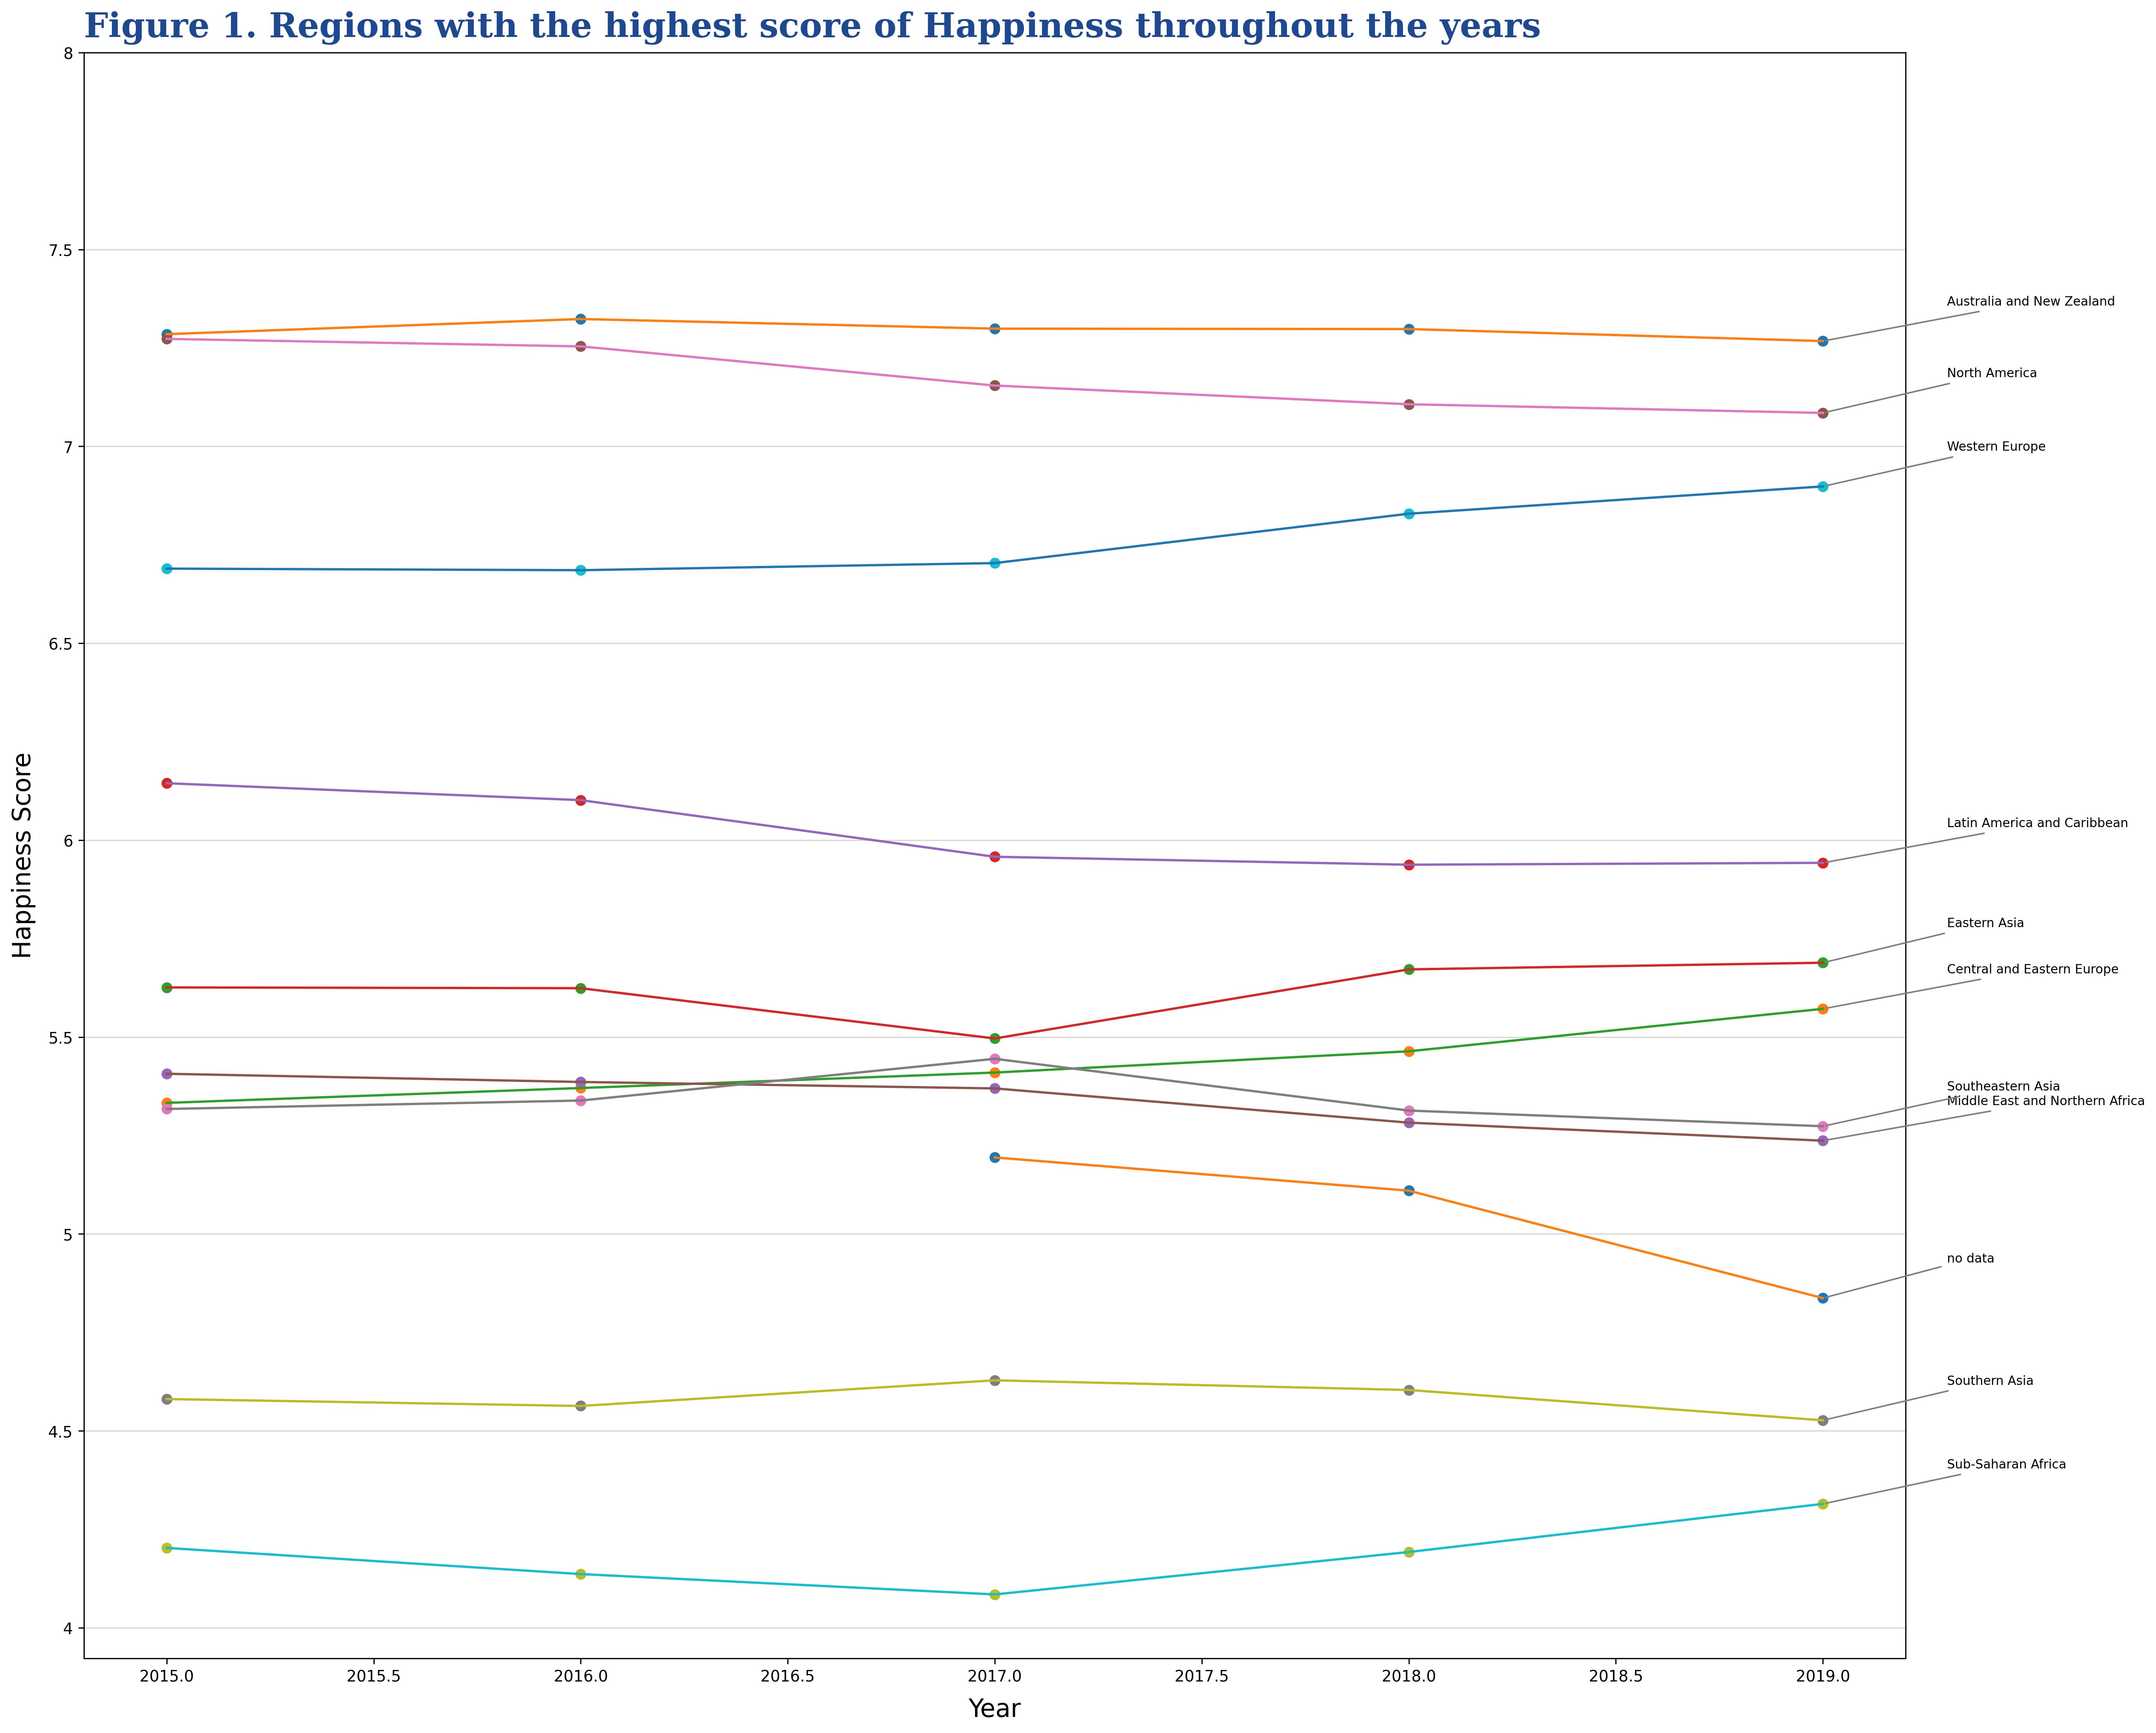

In [9]:
##Figure 1.
plt.figure(figsize=[21,19], dpi=300)
plt.title(
    "Figure 1. Regions with the highest score of Happiness throughout the years", 
    fontdict=title_font,
    loc='left',
    pad=10
)


names = first_graph.index.get_level_values(level=0).unique()
for region in names:
    plt.plot(first_graph.loc[region],"o")
for region in names:
    plt.plot(first_graph.loc[region])
    ####add points for each iteration

    plt.xlabel(
        "Year",
        fontdict=label_font,
        labelpad=8
    )
    plt.ylabel(
        "Happiness Score",
        fontdict=label_font,
        labelpad=8
    )
    plt.grid(True, axis='y', alpha=0.5)



    plt.yticks(
        ticks=[4,4.5,5,5.5,6,6.5,7,7.5,8],
        labels=[4,4.5,5,5.5,6,6.5,7,7.5,8]
    )

for region in names:

  x_coord = first_graph.loc[region].index[-1]
  y_coord = first_graph.loc[region].iloc[-1]
  y_coord = y_coord["Score"]
  
 
  plt.annotate(
          region, 
          xy=(x_coord, y_coord), 
          xytext=(x_coord+0.3, y_coord+0.1), 
          arrowprops={
              'arrowstyle':'-',
              'color':'gray'
          },
          verticalalignment="center", 
          fontsize=8)

plt.show()

The following graph displays the average happiness score per region as a function of time. As can be seen, the Australian and New Zealand region ranked the highest, while the Sub-Saharan African region ranked the lowest. It is important to note that the “no data” line represents entries in the dataset for which no region has been specified. There are 5 points per line, they represent the average score of happiness for each region as to better visualize the ranking of each regions.

# Figure 2 and 3

The coefficient of correlation is: 0.8019630253228073


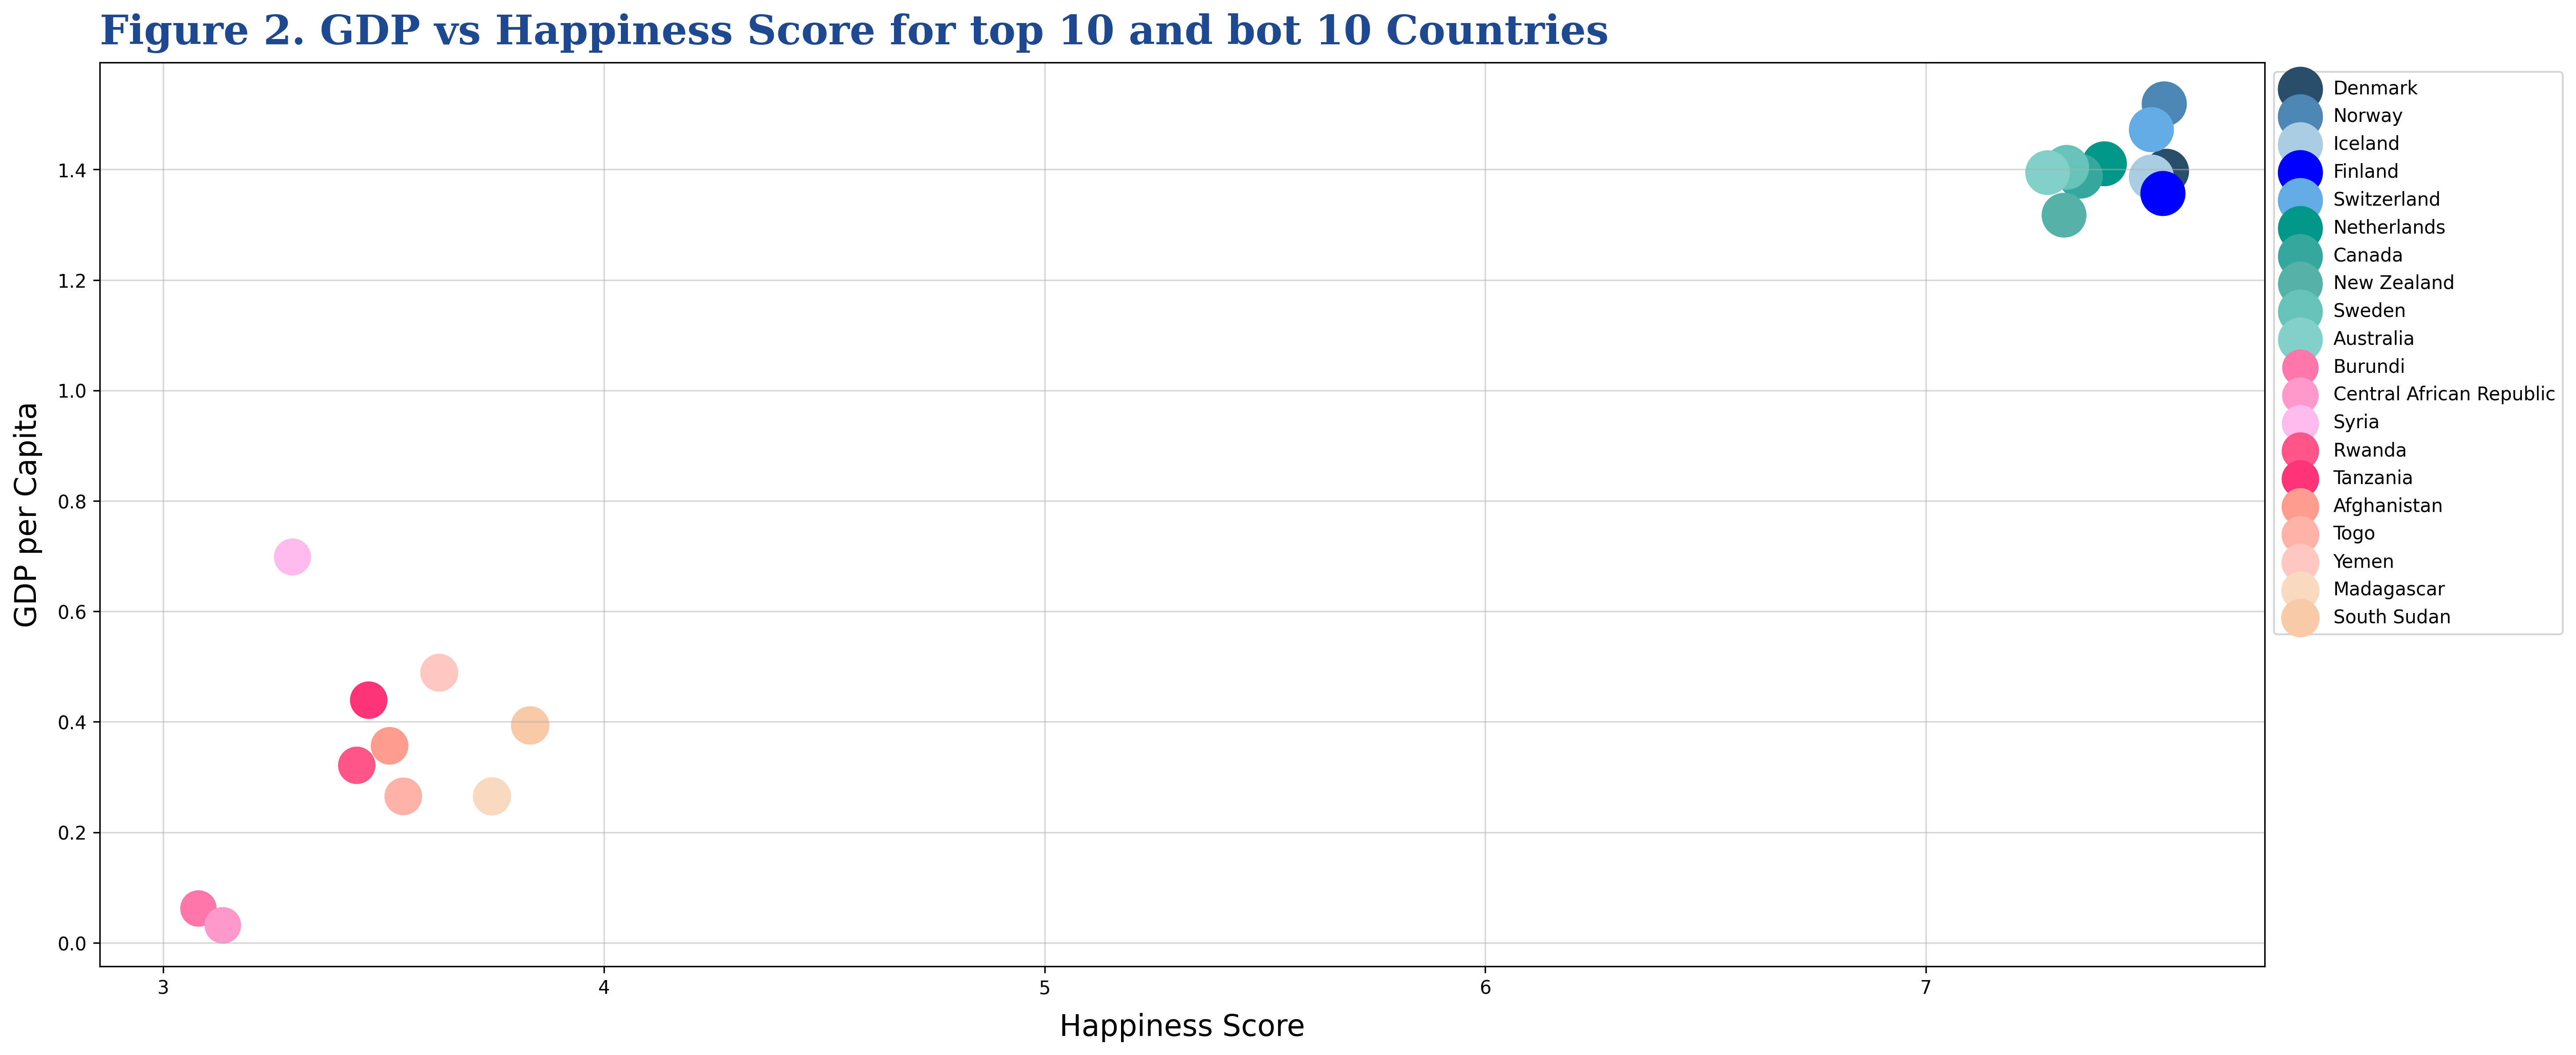

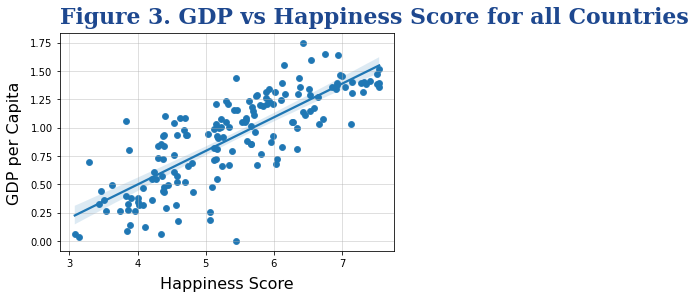

In [10]:
##Figure 2.
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 2. GDP vs Happiness Score for top 10 and bot 10 Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "GDP per Capita",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
colours = ["#2A4D69","#4B86B4","#ABCDE3","#0000FF","#63ACE5","#009688","#35A79C","#54B2A9","#65C3BA","#83D0C9","#FF77AA","#FF99CC","#FFBBEE","#FF5588","#FF3377","#FE9C8F","#FEB2A8","#FEC8C1","#FAD9C1","#F9CAA7"]

for i, name in enumerate(plot_data.index):
  plt.scatter(plot_data.at[name, "Score"], plot_data.at[name, "GDP"], c=colours[i], s=200*math.sqrt(plot_data.at[name, "Score"]))

plt.legend(plot_data["Country"],bbox_to_anchor=(1.0, 1.0))

##Figure 3
average.plot.scatter( x = "Score", y = "GDP")
sns.regplot(x='Score', y='GDP', data=average)

plt.title(
    "Figure 3. GDP vs Happiness Score for all Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "GDP per Capita",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
plt.rcParams["figure.figsize"] = (21,9)



col1=average["Score"]
col2=average["GDP"]
print('The coefficient of correlation is:',col1. corr(col2))


In the previous graphs,the analysis of the relationship between the GDP per capita of a country and their respective happiness score is presented. The first one visualises the happiness scores of the top ten and bottom ten countries' happiness scores in comparison to their GDP.  We can conclude that the GDP factor ,that is, the gross domestic product produced by each country, is an influential factor in the happiness scores. Notably, because of the great disparity among the happiness scores of richer countries, in comparison to the poorer ones who have a significantly smaller GDP. The second graph represents each individual country and their happiness scores in comparison to their GDP. The influence of this factor can also be confirmed by analysing the overall trend of the scatter plot. In other words, the coefficient of correlation being roughly 0.80 is close to 1 thus confirming the correlation of the GDP and the happiness score of each country. 

# Figure 4 and 5

The coefficient of correlation is: 0.7337723301358965


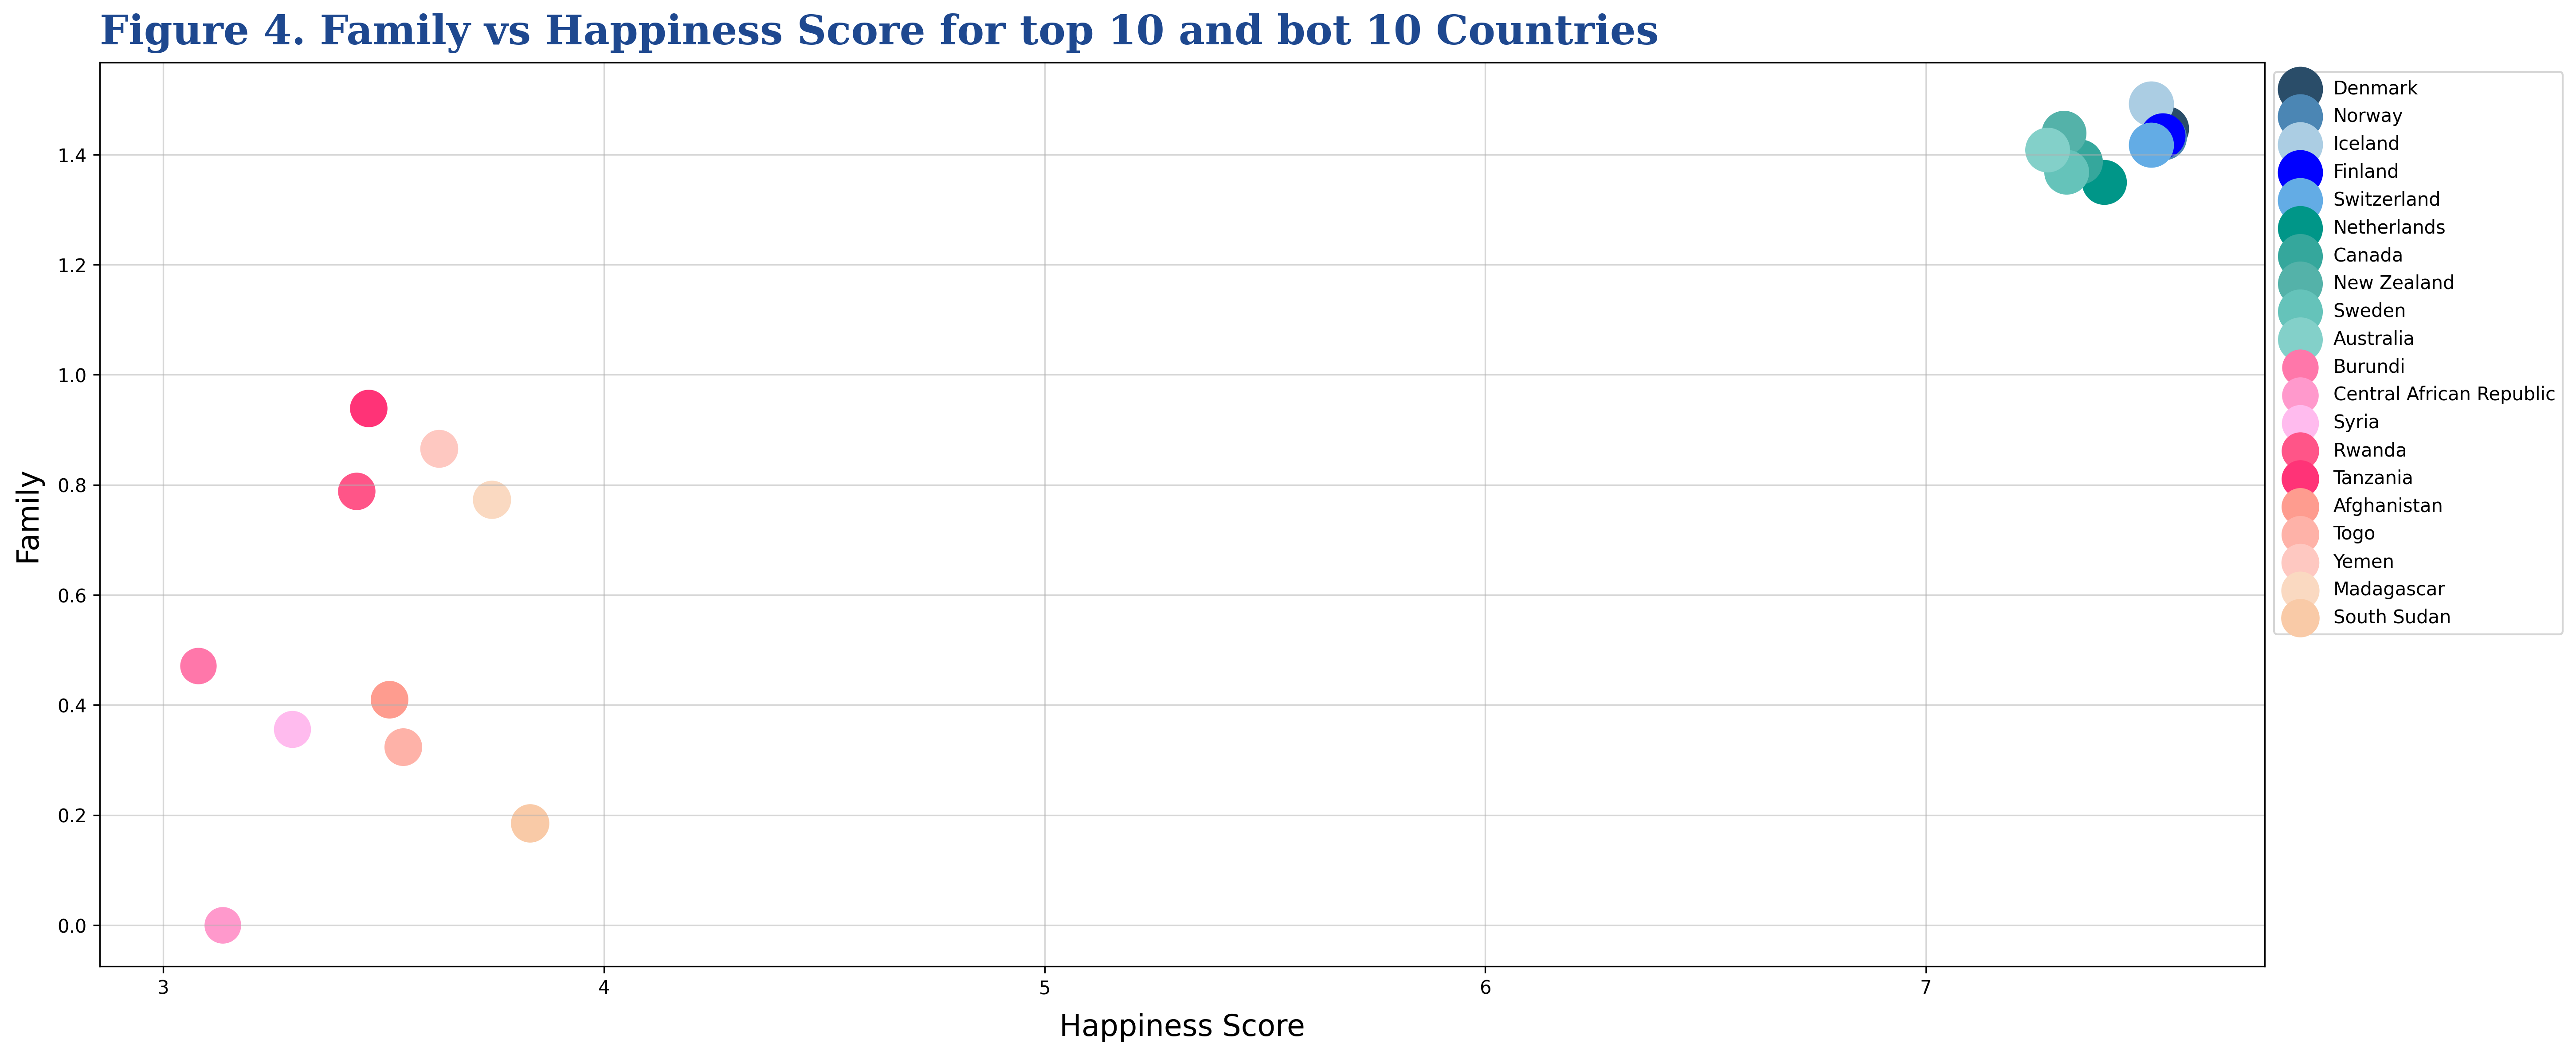

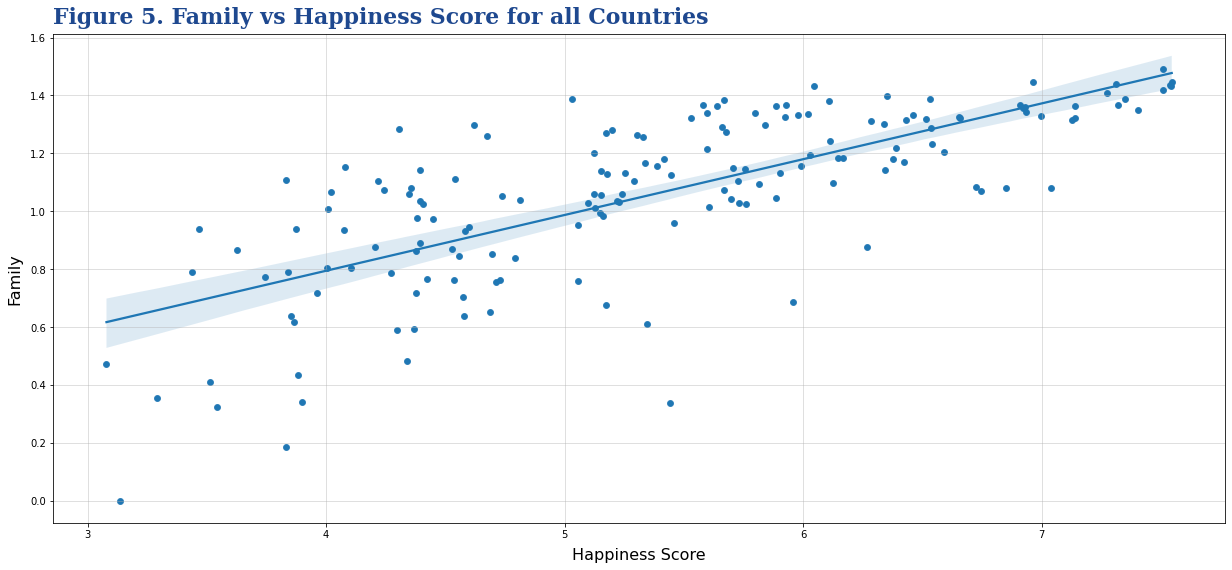

In [13]:
##Figure 4.
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 4. Family vs Happiness Score for top 10 and bot 10 Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Family",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
colours = ["#2A4D69","#4B86B4","#ABCDE3","#0000FF","#63ACE5","#009688","#35A79C","#54B2A9","#65C3BA","#83D0C9","#FF77AA","#FF99CC","#FFBBEE","#FF5588","#FF3377","#FE9C8F","#FEB2A8","#FEC8C1","#FAD9C1","#F9CAA7"]

for i, name in enumerate(plot_data.index):
  plt.scatter(plot_data.at[name, "Score"], plot_data.at[name, "Family"], c=colours[i], s=200*math.sqrt(plot_data.at[name, "Score"]))

plt.legend(plot_data["Country"],bbox_to_anchor=(1.0, 1.0))

##Figure 5
average.plot.scatter( x = "Score", y = "Family")
sns.regplot(x='Score', y='Family', data=average)
plt.title(
    "Figure 5. Family vs Happiness Score for all Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Family",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
plt.rcParams["figure.figsize"] = (21,9)

col1=average["Score"]
col2=average["Family"]
print('The coefficient of correlation is:',col1. corr(col2))

In the previous graphs, the analysis of the Family factor contributing to the happiness score is shown. The first graph visualises the happiness of the top ten and bottom ten countries' happiness scores versus the importance of living in a familial community. We can conclude that the Family factor is an influential factor in the happiness scores of each country. As can be seen the top 10 countries clustered, find themselves associating the familial factor to their happiness. Although, there still is a great difference among richer and poorer countries, the bottom ten seem to value more or less the familial factor, notably because they are not as clustered as the rich. The second graph represents each individual country and their happiness scores in comparison to the importance given to the Family. The influence of this factor can also be confirmed by analysing the overall trend of the scatter plot. In other words, the coefficient of correlation being roughly 0.73  is close to 1 thus confirming the correlation of the Family factor and the happiness score of each country. 

# Figure 6 and 7

The coefficient of correlation is: 0.7337723301358965


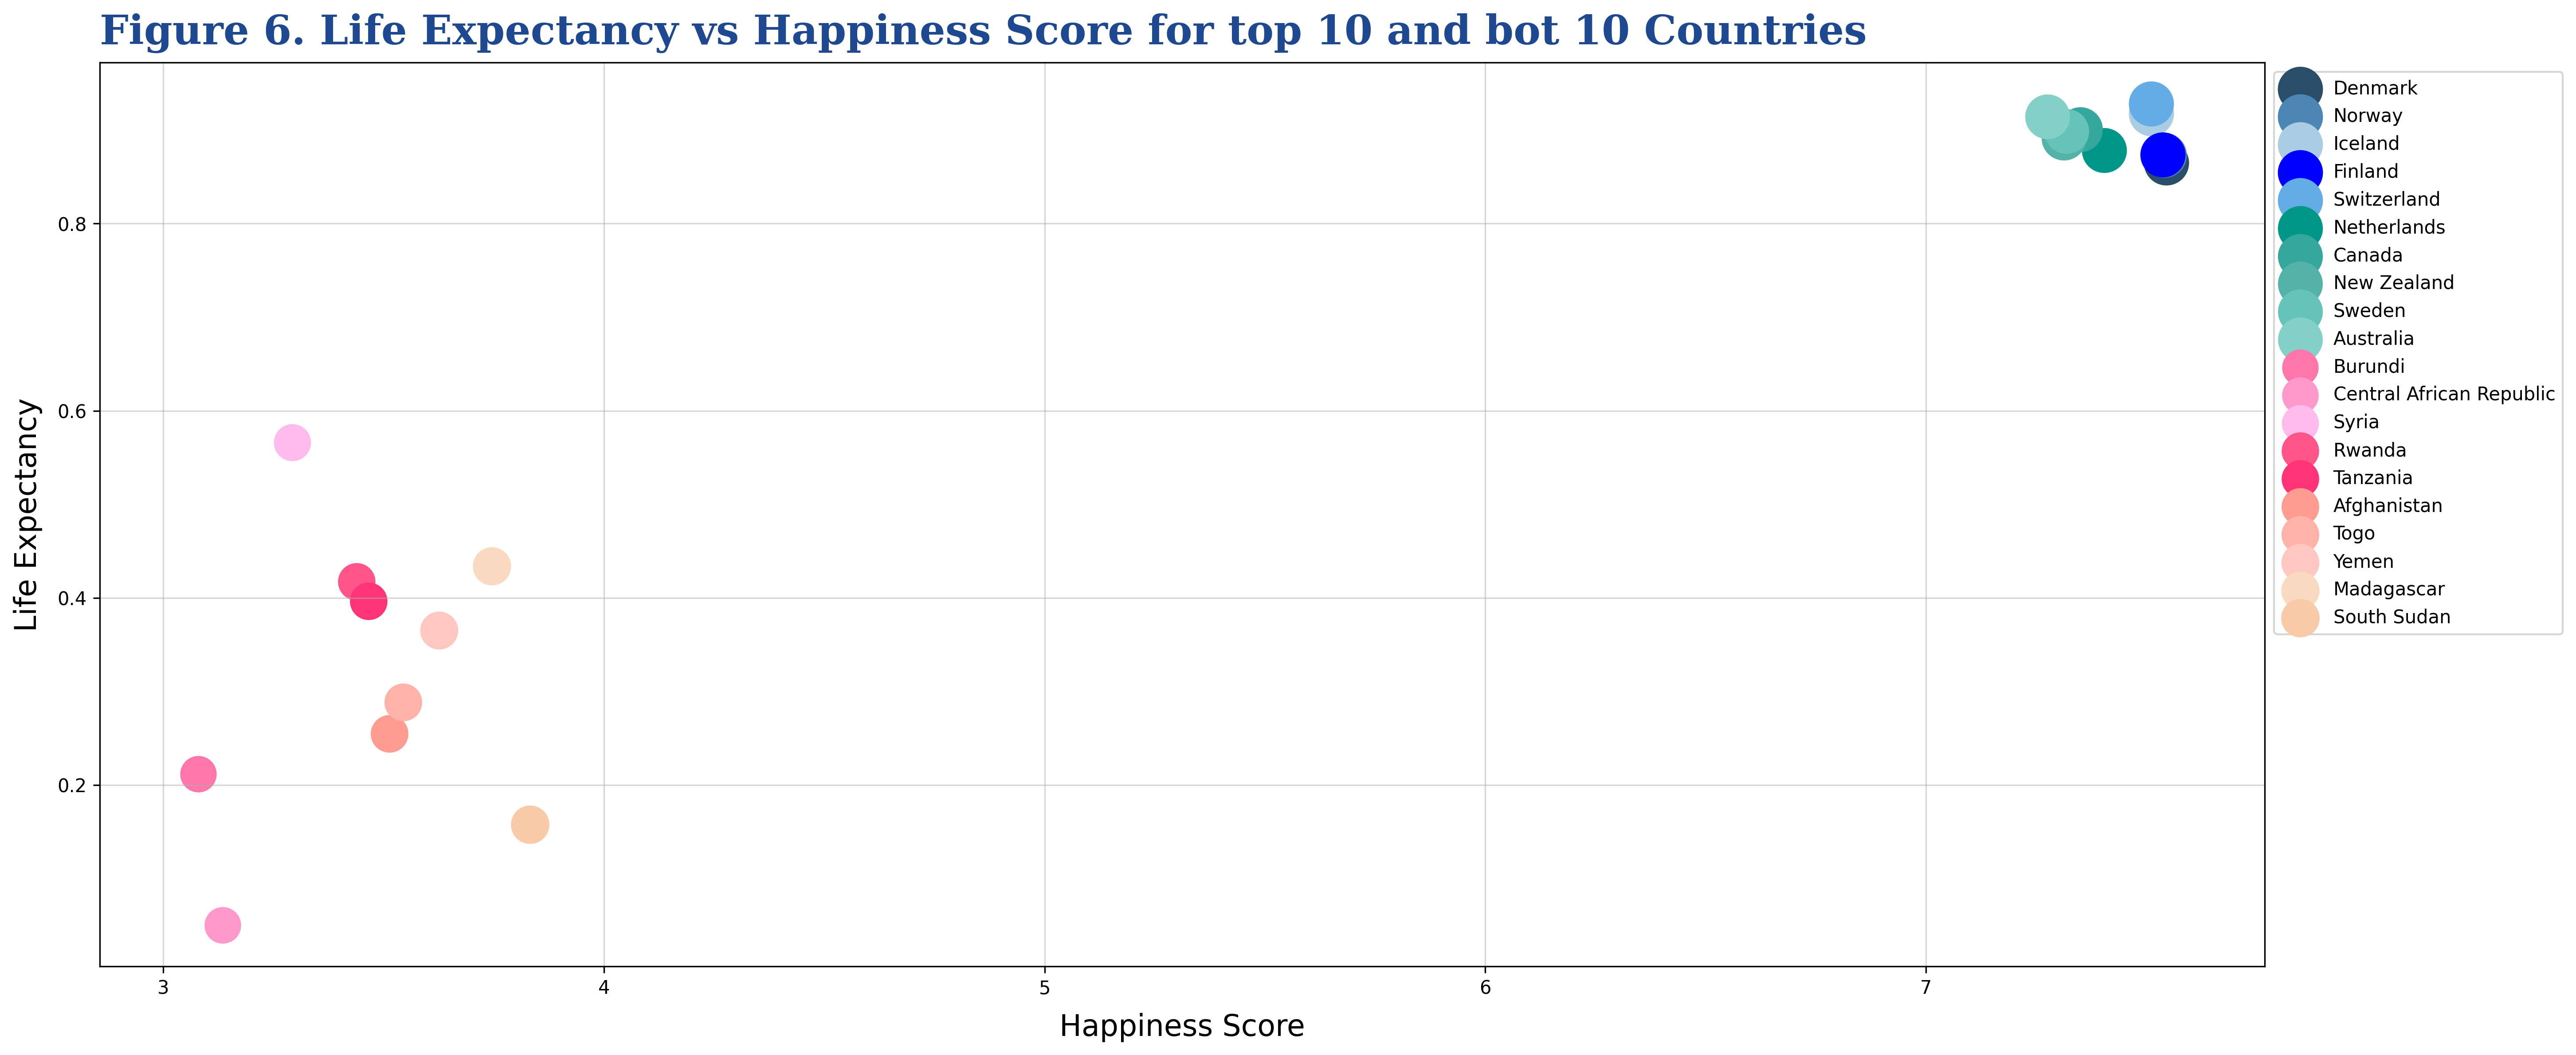

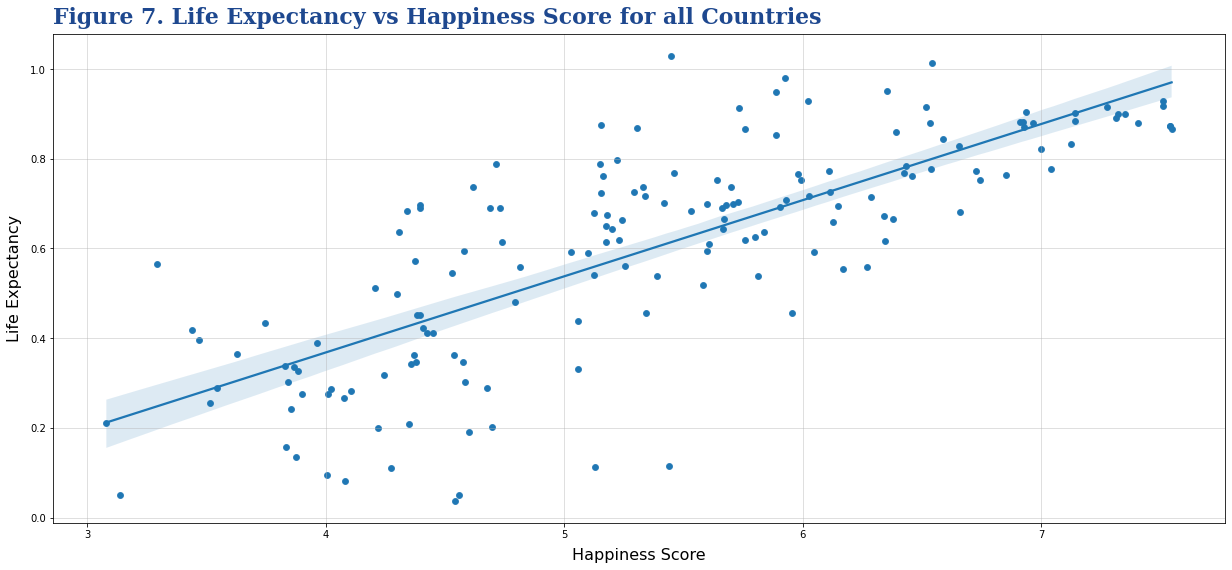

In [14]:
##Figure 6.
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 6. Life Expectancy vs Happiness Score for top 10 and bot 10 Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Life Expectancy",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
colours = ["#2A4D69","#4B86B4","#ABCDE3","#0000FF","#63ACE5","#009688","#35A79C","#54B2A9","#65C3BA","#83D0C9","#FF77AA","#FF99CC","#FFBBEE","#FF5588","#FF3377","#FE9C8F","#FEB2A8","#FEC8C1","#FAD9C1","#F9CAA7"]

for i, name in enumerate(plot_data.index):
  plt.scatter(plot_data.at[name, "Score"], plot_data.at[name, "Life Expectancy"], c=colours[i], s=200*math.sqrt(plot_data.at[name, "Score"]))

plt.legend(plot_data["Country"],bbox_to_anchor=(1.0, 1.0))

##Figure 7
average.plot.scatter( x = "Score", y = "Life Expectancy")
sns.regplot(x='Score', y='Life Expectancy', data=average)
plt.title(
    "Figure 7. Life Expectancy vs Happiness Score for all Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Life Expectancy",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
plt.rcParams["figure.figsize"] = (21,9)

col1=average["Score"]
col2=average["Family"]
print('The coefficient of correlation is:',col1. corr(col2))

In the previous graphs, the analysis of the health aspect presented under the Life Expectancy factor contributing to the happiness score is discussed. The first graph visualises the happiness of the top ten and bottom ten countries' happiness scores in comparison to their average life expectancy. We can conclude that the overall health of the population is an influential factor in the happiness scores of each country. As can be seen the top 10 countries are once again clustered,  thus establishing an  association between the average life expectancy of a country to its happiness score. Although, there still is a great difference among richer and poorer countries, among the bottom ten the average life expectancy does not seem to have as much effect on the happiness score as in the case of the top ten. The second graph represents each individual country and their happiness scores in comparison to their average life expectancy. The influence of this factor can also be confirmed by analysing the overall trend of the scatter plot. In other words, the coefficient of correlation being roughly 0.73  is close to 1 thus confirming the correlation of the Life Expectancy factor and the happiness score of each country.

# Figure 8 and 9

The coefficient of correlation is: 0.5913966903817145


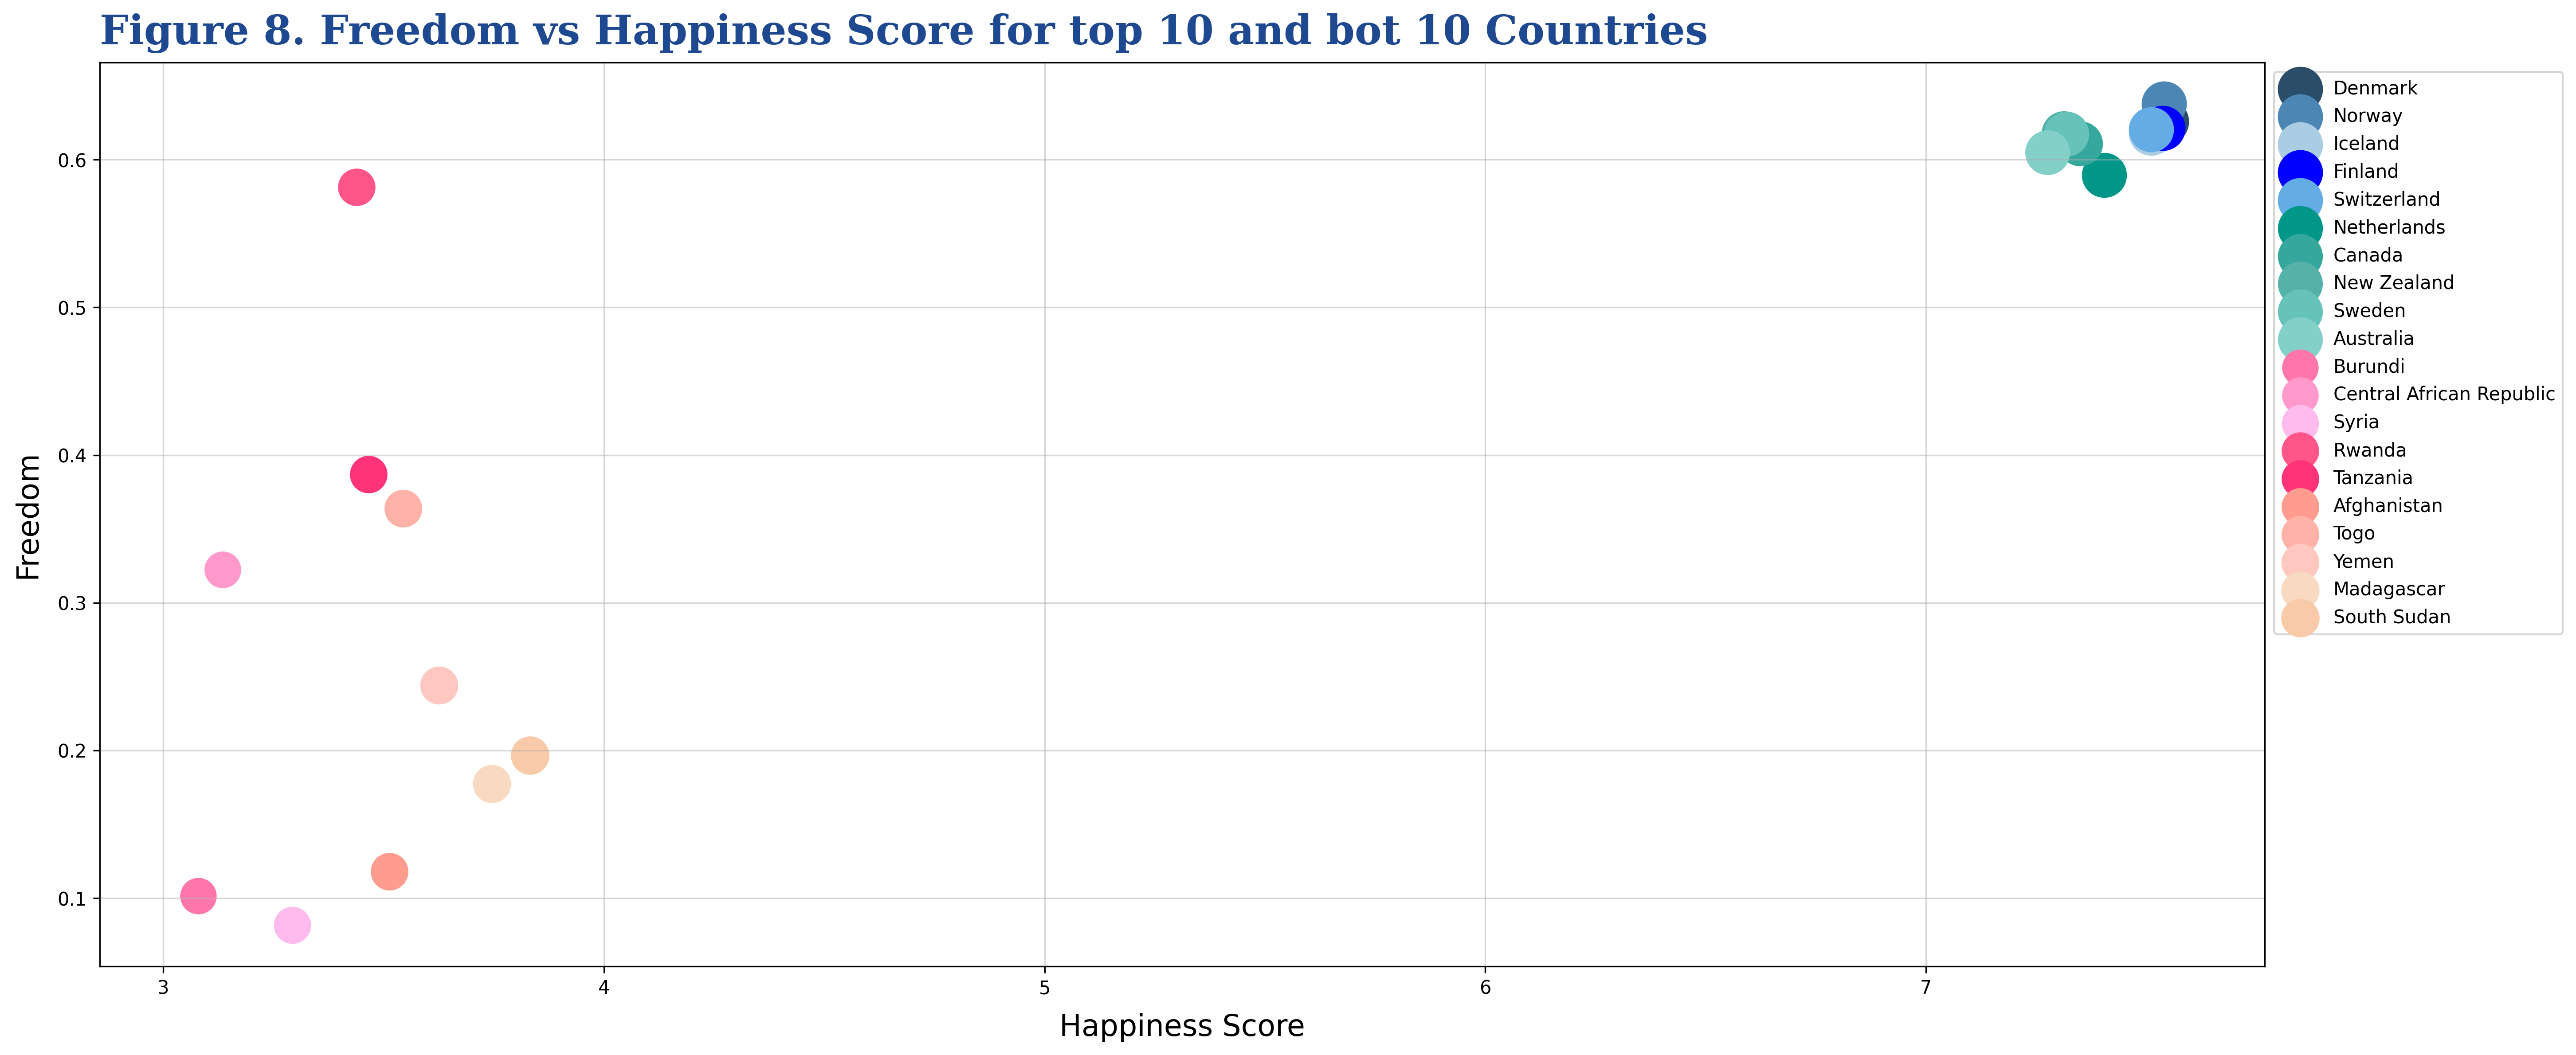

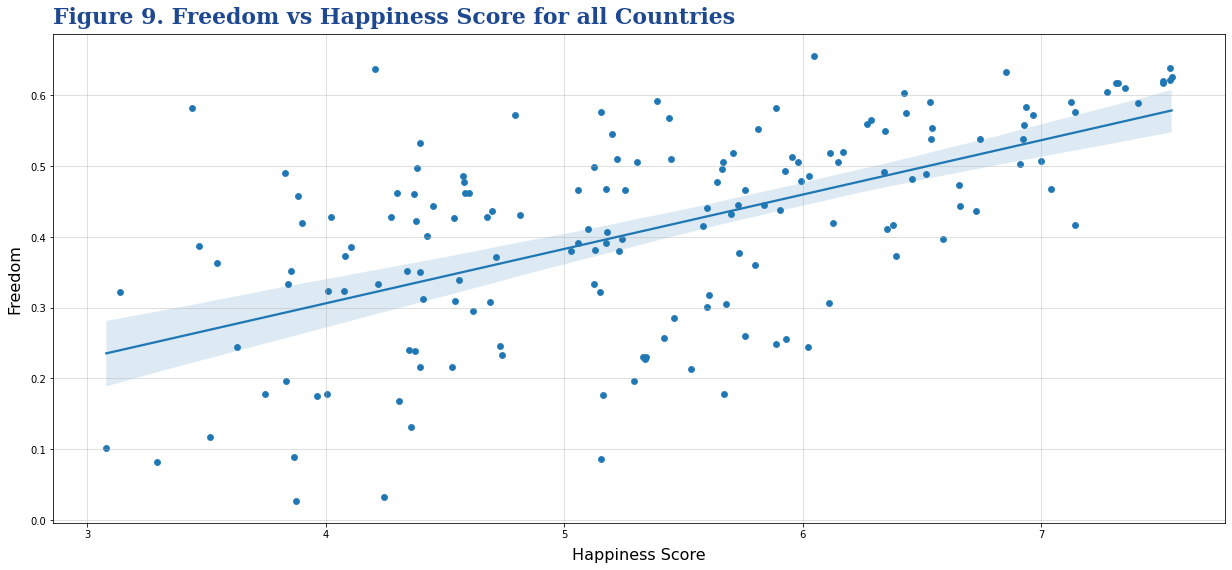

In [15]:
##Figure 8.
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 8. Freedom vs Happiness Score for top 10 and bot 10 Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Freedom",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
colours = ["#2A4D69","#4B86B4","#ABCDE3","#0000FF","#63ACE5","#009688","#35A79C","#54B2A9","#65C3BA","#83D0C9","#FF77AA","#FF99CC","#FFBBEE","#FF5588","#FF3377","#FE9C8F","#FEB2A8","#FEC8C1","#FAD9C1","#F9CAA7"]

for i, name in enumerate(plot_data.index):
  plt.scatter(plot_data.at[name, "Score"], plot_data.at[name, "Freedom"], c=colours[i], s=200*math.sqrt(plot_data.at[name, "Score"]))

plt.legend(plot_data["Country"],bbox_to_anchor=(1.0, 1.0))

##Figure 9
average.plot.scatter( x = "Score", y = "Freedom")
sns.regplot(x='Score', y='Freedom', data=average)
plt.title(
    "Figure 9. Freedom vs Happiness Score for all Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Freedom",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
plt.rcParams["figure.figsize"] = (21,9)

col1=average["Score"]
col2=average["Freedom"]
print('The coefficient of correlation is:',col1. corr(col2))

In the previous graphs, the analysis of the freedom of the population and its relationship to the respective country’s happiness score, will be discussed. The first graph visualises the happiness of the top ten and bottom ten countries' happiness scores in comparison to the freedom given to their population. We can conclude that the overall freedom of the population is somewhat of an influential factor in the happiness scores of each country. As can be seen the top 10 countries are once again clustered,  thus establishing an  association between the freedom of a country to its happiness score. Although, there still is a great difference among richer and poorer countries, among the bottom ten the average freedom is not a conclusive factor because the data fluctuates a lot in comparison to the top ten. The second graph represents each individual country and their happiness scores in comparison to their average freedom. The lack of importance of the influence of this factor can also be confirmed by analysing the overall trend of the scatter plot. In other words, the coefficient of correlation being roughly 0.59  is closer to 0.5 than 1 thus confirming that there is some correlation of the Freedom factor and the happiness score of each country but it isn’t something that can be relied on completely as can be seen for poorer countries.

# Figure 10 and 11

The coefficient of correlation is: 0.1459083690397746


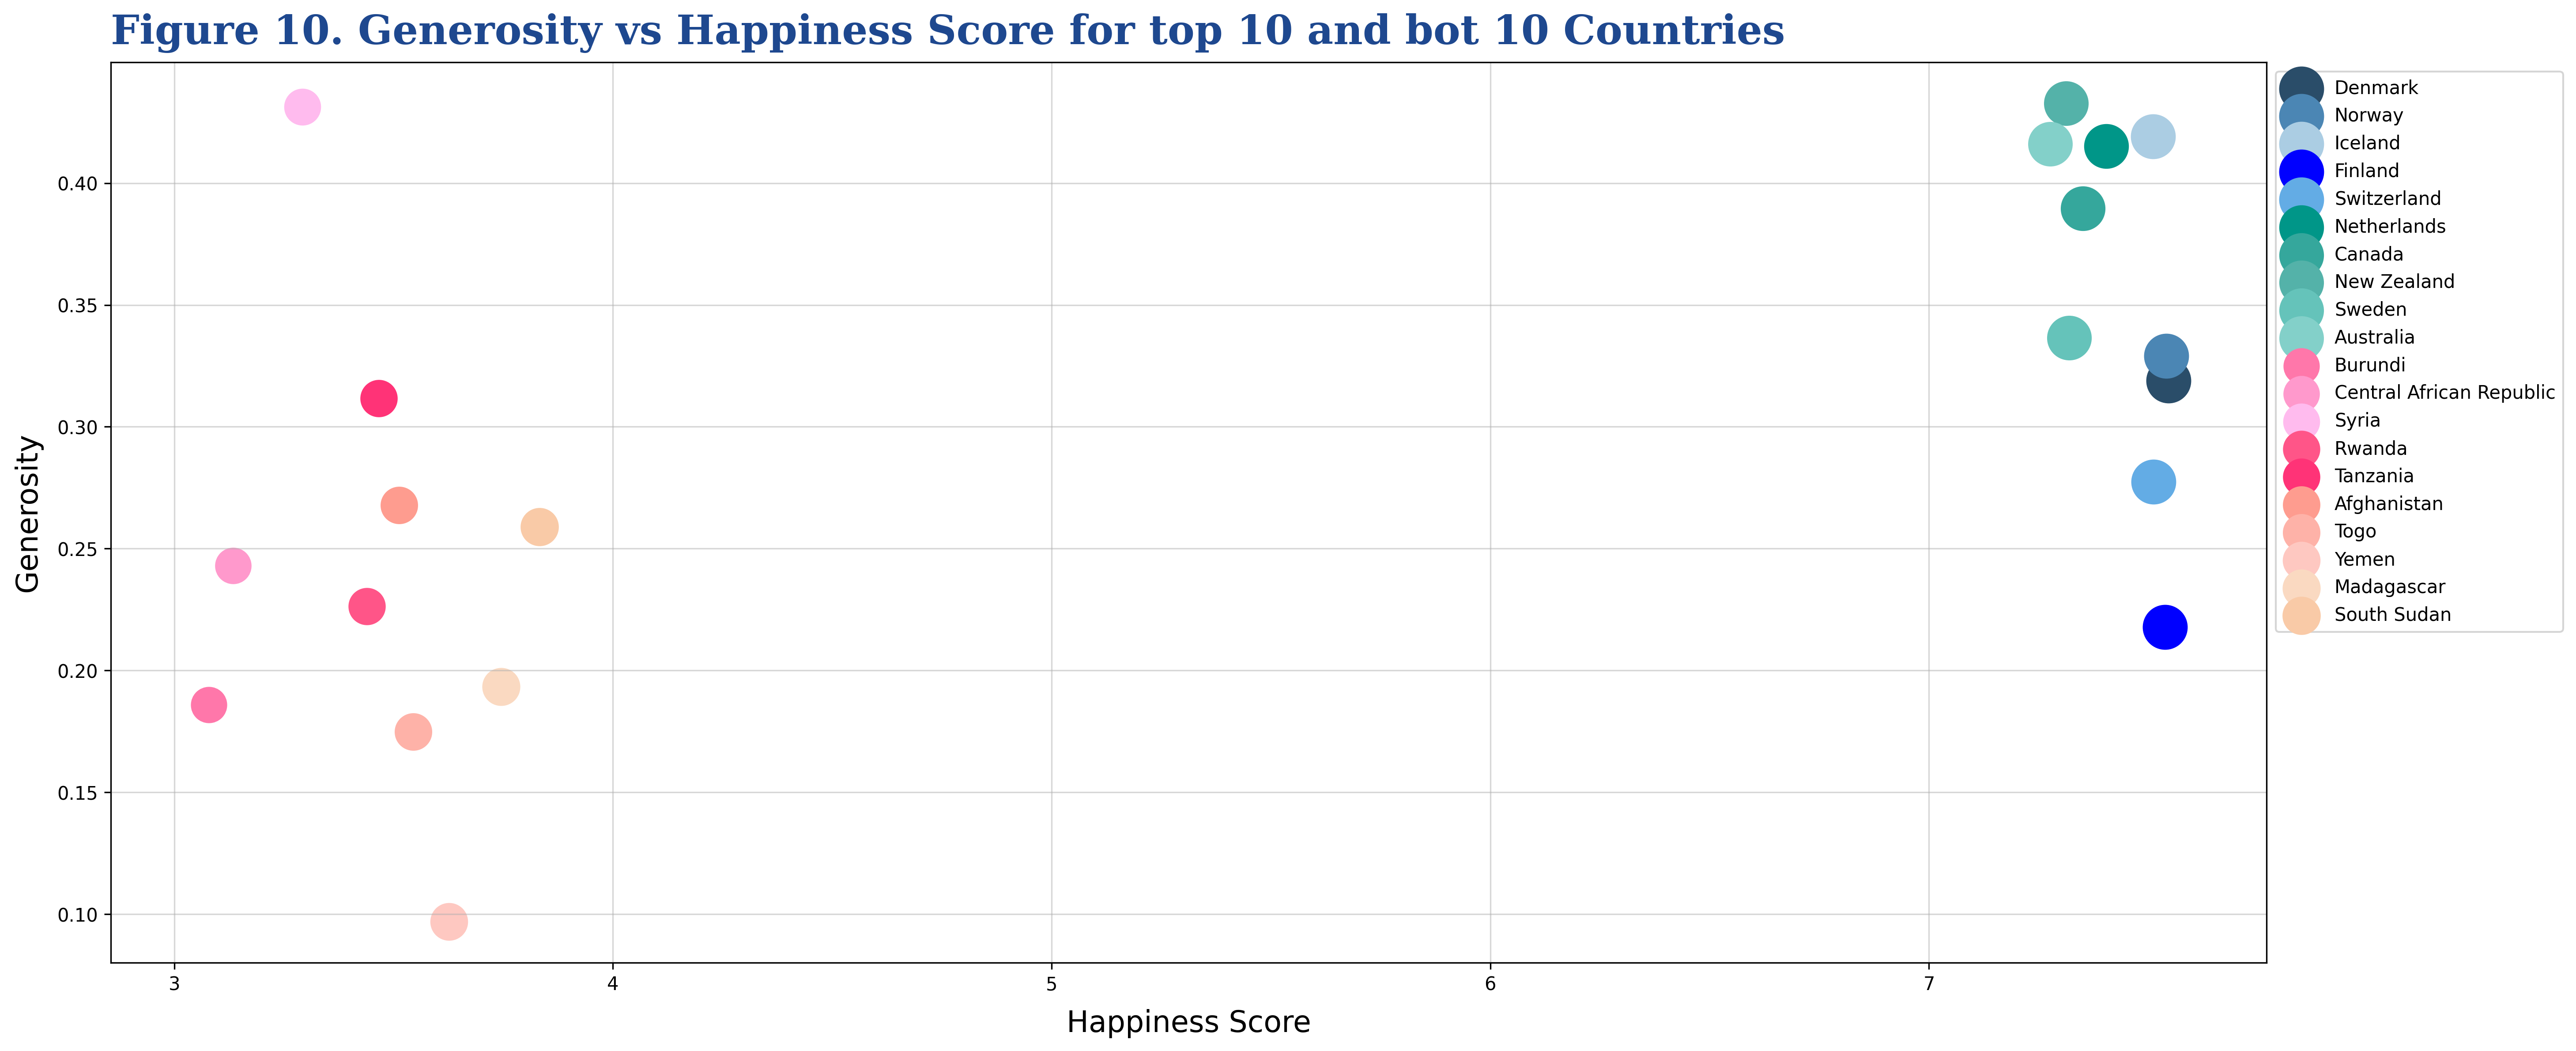

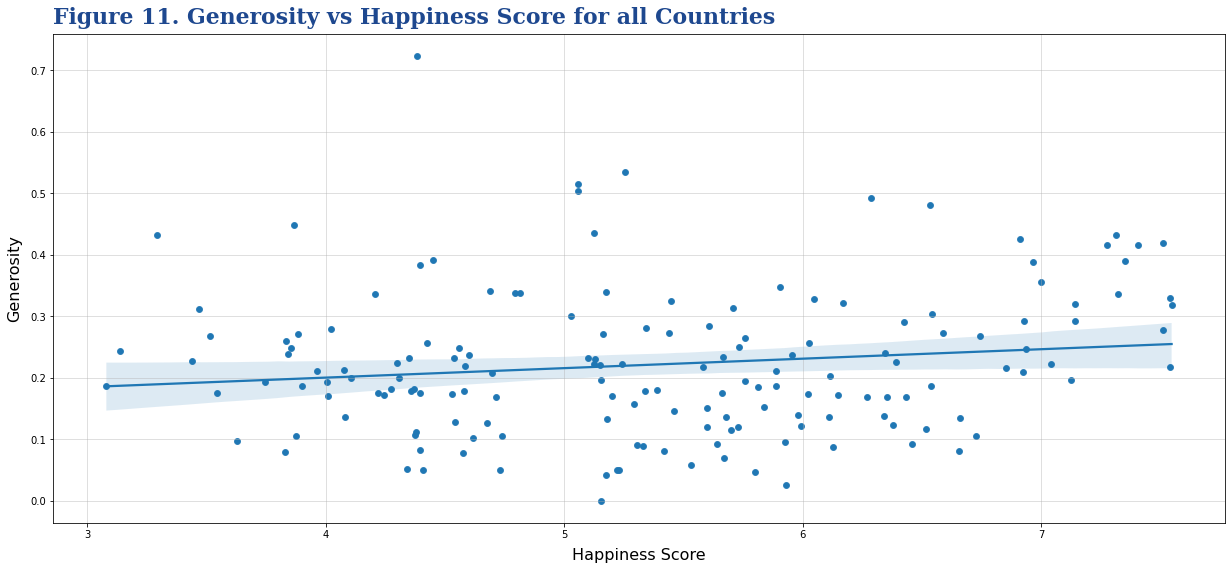

In [16]:
##Figure 10.
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 10. Generosity vs Happiness Score for top 10 and bot 10 Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Generosity",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
colours = ["#2A4D69","#4B86B4","#ABCDE3","#0000FF","#63ACE5","#009688","#35A79C","#54B2A9","#65C3BA","#83D0C9","#FF77AA","#FF99CC","#FFBBEE","#FF5588","#FF3377","#FE9C8F","#FEB2A8","#FEC8C1","#FAD9C1","#F9CAA7"]

for i, name in enumerate(plot_data.index):
  plt.scatter(plot_data.at[name, "Score"], plot_data.at[name, "Generosity"], c=colours[i], s=200*math.sqrt(plot_data.at[name, "Score"]))

plt.legend(plot_data["Country"],bbox_to_anchor=(1.0, 1.0))

##Figure 11
average.plot.scatter( x = "Score", y = "Generosity")
sns.regplot(x='Score', y='Generosity', data=average)
plt.title(
    "Figure 11. Generosity vs Happiness Score for all Countries", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Happiness Score",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Generosity",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)
plt.rcParams["figure.figsize"] = (21,9)

col1=average["Score"]
col2=average["Generosity"]
print('The coefficient of correlation is:',col1. corr(col2))

In the  previous graphs, the analysis of the Generosity factor of a country and its relationship to its happiness score, will be discussed. The first graph visualises the happiness of the top ten and bottom ten countries' happiness scores in comparison to it[‘s generocity. We can conclude that the overall generosity of a country is not an important influential factor in the happiness scores of each country. As can be seen for both the top 10 and the bottom ten there is a significant amount of variation in the spacing of each point in the scatter plot respective to their group.Thus proving a weak association between the generosity of a country and its happiness score. The second graph represents each individual country and their happiness scores in comparison to their generosity. The insignificance of the influence of this factor can also be confirmed by analysing the overall trend of the scatter plot. In other words, the coefficient of correlation being roughly 0.15  is closer to 0 than 1 thus confirming that there is very little correlation between the Generosity factor and the happiness score of each country. 

# Analysis Question 1


From the Figure 1, it is clear which region is the happiest and the unhappiest. The plot situated on the lowest happiness score scale is Sub-Saharan Africa while the highest ranking region is Australia and New Zealand as it is only composed of those two countries. A more representative result would be to take the second happiest region which would be North America. A lot of individuals would believe that Western Europe would be in first place; as the top 10 countries are mostly comprised of countries in the Western Europe region. However, Western Europe as a whole only reaches third place.

# Analysis Question 2


From Figure 2 to 11, we are able to define the importance of a factor to the contribution of a countries happiness score. For this question, we will consider that a correlation above 0.7 is sufficient enough to prove that there is a correlation. As such from figure 3, the GDP per capita heavily impacts the happiness score as the coefficient of correlation is of 0.80. From figure 5, the coefficient of correlation is of 0.73, therefore there is a significant relation between family and happiness. From figure 7, the coefficient of correlation is of 0.73, therefore there is a significant relation between life expectancy and happiness. From figure 9, the coefficient of correlation is of 0.59, as it is under our threshold of 0.7 the relation between freedom and hapiness is negligeable. From figure 11, the coefficient of correlation is of 0.15, therefore the relation between generosity and happiness is negligeable.

# Conclusions

The main arguments to determine which region was happiest during the years of 2015-2019 was by analyzing the average happiness score of a region throughout the years. As such, the graphs clearly shows us which region is the happiest and which regions are the least happy. We can effectively answering the first part of the project by saying that the happiess region is Australia and New Zealand.

The main arguments to determine whether a factor was important in determining a countries happiness was by using a regression line on each figure showing the happiness score of all countries over a specific factor. The coefficient of correlation would give us empirical evidence in determining whether a factor was important or not. From our analysis, GDP, Family, and life expectancy where the three most important factor in determining a countries happiness. Furthermore, from the top 10 and bot 10 countries figures, we could further analyze the discrepancies of the factor within the happiest and unhappiest countries in the world.

# Work Cited


Sumner, J. https://colab.research.google.com/drive/1HqGnYLor_rCVV0Jm19nQkX9_AjbsjQzq?usp=sharing 

Used for fonts and plot the graphs.

https://seaborn.pydata.org/tutorial/regression.html 

Used for linear regression

https://www.kaggle.com/unsdsn/world-happiness

Used for data